# <h1 align="center">FELICIDADE MUNDIAL (2019)</h1>

> <p align="center">Dados coletados de <a href="https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019/version/1">kaggle.com</a> e mantidos versionados em <a href="https://github.com/thalysonrodrigues/datasets/tree/master/data/world-happiness-2019">github.com/thalysonrodrigues/datasets</a></p>
---

### <p align="justify">Esta é uma análise de dados realizada a partir das bases coletadas em *kaggle.com*. Estes dados apresentam a felicidade mundial no ano de 2019 e como ela é determinada a partir de tecnologias, políticas governamentais e normas sociais.</p>

<p align="justify">O World Happiness Report é uma pesquisa histórica sobre o estado de felicidade global que classifica 156 países pelo quão felizes seus cidadãos se percebem. Este ano, o Relatório Mundial sobre a Felicidade concentra-se na felicidade e na comunidade: como a felicidade evoluiu nos últimos doze anos, com foco nas tecnologias, normas sociais, conflitos e políticas governamentais que impulsionaram essas mudanças. (KAGGLE, 2019)</p>

<div>
  <img src="https://raw.githubusercontent.com/thalysonrodrigues/datasets/master/data/world-happiness-2019/dataset-cover.jpg">
</div>

## QUESTÕES

### Este estudo tem por objetivo responder as seguintes questões:

#### 1 - Quais paises tem os menores fatores que elevam a felicidade?

#### 2 - A escala de satisfação com a vida é afetada pela expectativa de vida nas regiões analisadas?

### Neste estudo foi utilizada as seguintes bibliotecas:

* **[pandas](https://pandas.pydata.org/) - análise, plotagem e operações em tabelas**
* **[numpy](https://numpy.org/) - funções matemáticas, estruturas de tipagem**
* **[matplotlib](https://matplotlib.org/) - incorporação de gráficos (utilizado por outras libs para plotagem)**
* **[seaborn](https://seaborn.pydata.org/) - visualização de dados estátisticos**

In [0]:
# importação de bibliotecas para análise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Contexto da pesquisa

O World Happiness Report (Relatório Mundial da Felicidade) realiza uma pesquisa anual histórica classificando 156 países por indíces que representam a felicidade. Os dados abaixo representam respectivamente o ***score*** de cada **região (país)**, em relação a estes fatores.

> **Os fatores análisados nesta pesquisa foram:**

* **Country (region)** - Nome da região (país)
* **Ladder** - Cantril Ladder é uma medida de satisfação com a vida
* **SD of Ladder** - Desvio padrão da escada de satisfação com a vida
* **Positive affect** - Medida de emoção positiva
* **Negative affect** - Medida de emoção negativa
* **Social Support** - A medida em que o apoio social contribuiu para o cálculo do índice de felicidade.
* **Freedom** - Até que ponto a Freedom contribuiu para o cálculo do Escore de Felicidade.
* **Corruption** - Até que ponto a Percepção da Corrupção contribui para o Escore de Felicidade.
* **Generosity** - Até que ponto a Generosidade contribuiu para o cálculo do Índice de Felicidade.
* **Log of GDP per capita** - Até que ponto o PIB contribui para o cálculo do Escore de Felicidade.
* **Healthy life expectancy** - A medida em que a expectativa de vida contribuiu para o cálculo do Escore de Felicidade.

In [0]:
# Leitura inicial dos dados coletados

df = pd.read_csv('https://raw.githubusercontent.com/thalysonrodrigues/datasets/master/data/world-happiness-2019/world_happiness_2019.csv')
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


### Coleta e limpeza de dados

In [0]:
df.dtypes

Country (region)             object
Ladder                        int64
SD of Ladder                  int64
Positive affect             float64
Negative affect             float64
Social support              float64
Freedom                     float64
Corruption                  float64
Generosity                  float64
Log of GDP\nper capita      float64
Healthy life\nexpectancy    float64
dtype: object

In [0]:
# para não perda de dados relevantes foi definido que dados com valores NaN (nulos)
# terão o valor 0, ou seja, não obtiveram uma posição na pesquisa levantada

df = df.fillna(0)

In [0]:
# foi verificado que os valores que são apresentados em ponto flutuante
# são descenessários para análise, sendo assim convertidos para inteiro

for column in df:
  # verificar o tipo de cada valor apresentado
  # e converter colunas inteiro
  if isinstance(df[column].values[0], np.float64):
    df[column] = df[column].astype('Int64')
    
df.dtypes
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41,10,2,5,4,47,22,27
1,Denmark,2,13,24,26,4,6,3,22,14,23
2,Norway,3,8,16,29,3,3,8,11,7,12
3,Iceland,4,9,3,3,1,7,45,3,15,13
4,Netherlands,5,1,12,25,15,19,12,7,12,18
5,Switzerland,6,11,44,21,13,11,7,16,8,4
6,Sweden,7,18,34,8,25,10,6,17,13,17
7,New Zealand,8,15,22,12,5,8,5,8,26,14
8,Canada,9,23,18,49,20,9,11,14,19,8
9,Austria,10,10,64,24,31,26,19,25,16,15


## Moda, média, mediana e quantis do fator **liberdade**

In [0]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,78.500000,77.500000,77.500000,77.500000,77.500000,70.679487,77.500000,74.538462,72.596154
std,45.177428,45.177428,45.177428,45.177428,45.177428,45.177428,44.884222,45.177428,45.112531,45.017814
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,39.750000,38.750000,38.750000,38.750000,38.750000,31.750000,38.750000,35.750000,33.750000
50%,78.500000,78.500000,77.500000,77.500000,77.500000,77.500000,70.500000,77.500000,74.500000,72.500000
75%,117.250000,117.250000,116.250000,116.250000,116.250000,116.250000,109.250000,116.250000,113.250000,111.250000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [0]:
# moda todos os itens são respectivamente uma posição para cada fator
# moda = df['Freedom'].mode()

# media
media = df['Ladder'].mean()

# median
mediana = df['Ladder'].median()

print('Fartor satisfação com a vida: média (%s) e mediana (%s)' % (media, mediana))

# media
media = df['SD of Ladder'].mean()

# median
mediana = df['SD of Ladder'].median()

print('Desvio padrão satisfação com a vida: média (%s) e mediana (%s)' % (media, mediana))

# media
media = df['Positive affect'].mean()

# median
mediana = df['Positive affect'].median()

print('Fartor afeto positivo: média (%s) e mediana (%s)' % (media, mediana))

# media
media = df['Negative affect'].mean()

# median
mediana = df['Negative affect'].median()

print('Fartor afeto negativo: média (%s) e mediana (%s)' % (media, mediana))

# media
media = df['Freedom'].mean()

# median
mediana = df['Freedom'].median()

print('Fartor liberdade: média (%s) e mediana (%s)' % (media, mediana))

# media
media = df['Corruption'].mean()

# median
mediana = df['Corruption'].median()

print('Fartor de corrupção: média (%s) e mediana (%s)' % (media, mediana))

# media
media = df['Generosity'].mean()

# median
mediana = df['Generosity'].median()

print('Fartor generosidade: média (%s) e mediana (%s)' % (media, mediana))

# media
media = df['Generosity'].mean()

# median
mediana = df['Generosity'].median()

print('Fartor generosidade: média (%s) e mediana (%s)' % (media, mediana))

Fartor satisfação com a vida: média (78.5) e mediana (78.5)
Desvio padrão satisfação com a vida: média (78.5) e mediana (78.5)
Fartor afeto positivo: média (77.5) e mediana (77.5)
Fartor afeto negativo: média (77.5) e mediana (77.5)
Fartor liberdade: média (77.5) e mediana (77.5)
Fartor de corrupção: média (70.67948717948718) e mediana (70.5)
Fartor generosidade: média (77.5) e mediana (77.5)
Fartor generosidade: média (77.5) e mediana (77.5)


## Questão 1 - Quais paises tem os menores fatores que elevam a felicidade?

In [0]:
bad_countries = df[df['Ladder'] == df['Ladder'].max()].append(df[df['SD of Ladder'] == df['SD of Ladder'].max()]).append(df[df['Positive affect'] == df['Positive affect'].max()]).append(df[df['Negative affect'] == df['Negative affect'].max()]).append(df[df['Freedom'] == df['Freedom'].max()]).append(df[df['Corruption'] == df['Corruption'].max()]).append(df[df['Generosity'] == df['Generosity'].max()]).append(df[df['Log of GDP\nper capita'] == df['Log of GDP\nper capita'].max()]).append(df[df['Healthy life\nexpectancy'] == df['Healthy life\nexpectancy'].max()])

## remover elementos duplicados
bad_countries = bad_countries.drop_duplicates()

bad_countries

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
155,South Sudan,156,140,127,152,148,154,61,85,140,143
140,Liberia,141,156,103,146,127,94,126,110,150,126
148,Syria,149,137,155,155,154,153,38,69,0,128
153,Afghanistan,154,25,152,133,151,155,136,137,134,139
70,Moldova,71,45,133,67,65,128,148,86,109,86
150,Yemen,151,85,153,75,100,147,83,155,141,124
154,Central African Republic,155,117,132,153,155,133,122,113,152,150


### Menor indíce de satisfação com a vida: Sudão do Sul (156)

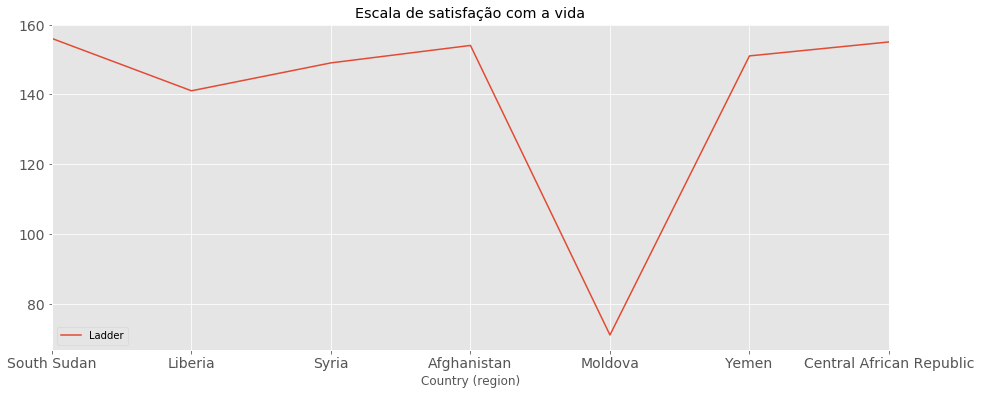

In [0]:
bad_countries.plot(x='Country (region)', y='Ladder', title='Escala de satisfação com a vida', fontsize='14', figsize=(15, 6))

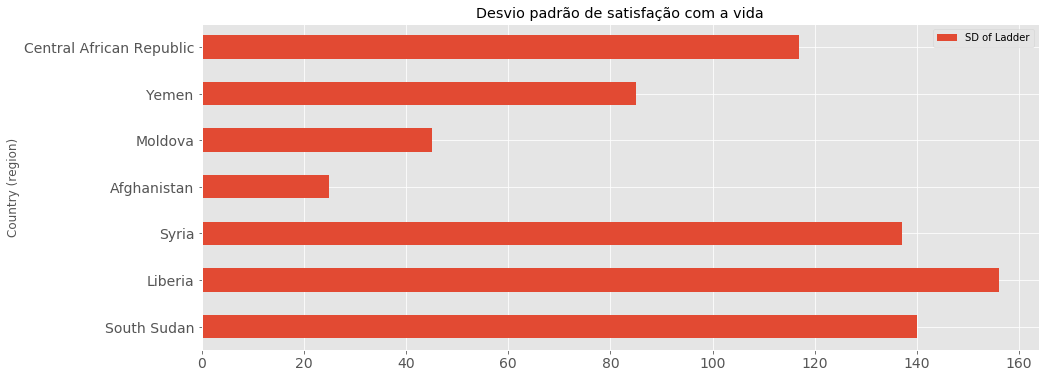

In [0]:
bad_countries.plot(x='Country (region)', y='SD of Ladder', title='Desvio padrão de satisfação com a vida', fontsize='14', figsize=(15, 6), kind='barh')

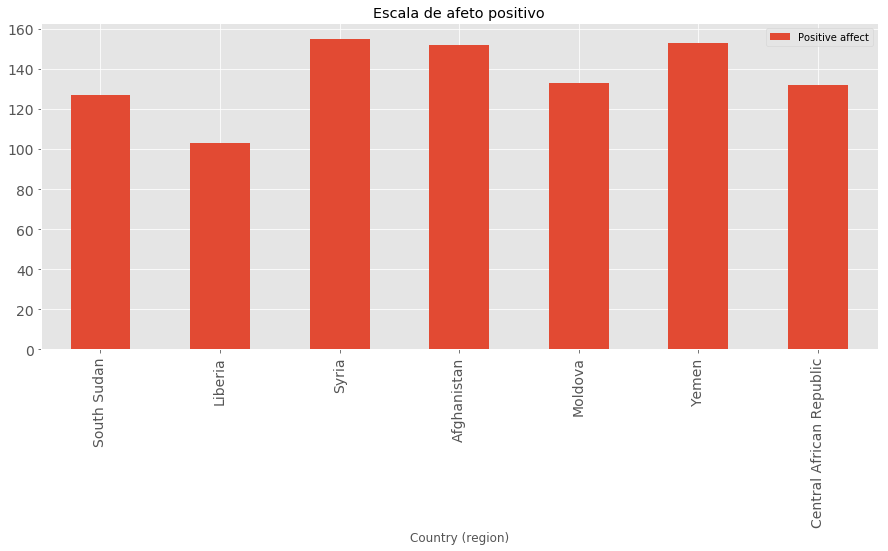

In [0]:
bad_countries.plot(x='Country (region)', y='Positive affect', title='Escala de afeto positivo', fontsize='14', figsize=(15, 6), kind='bar')

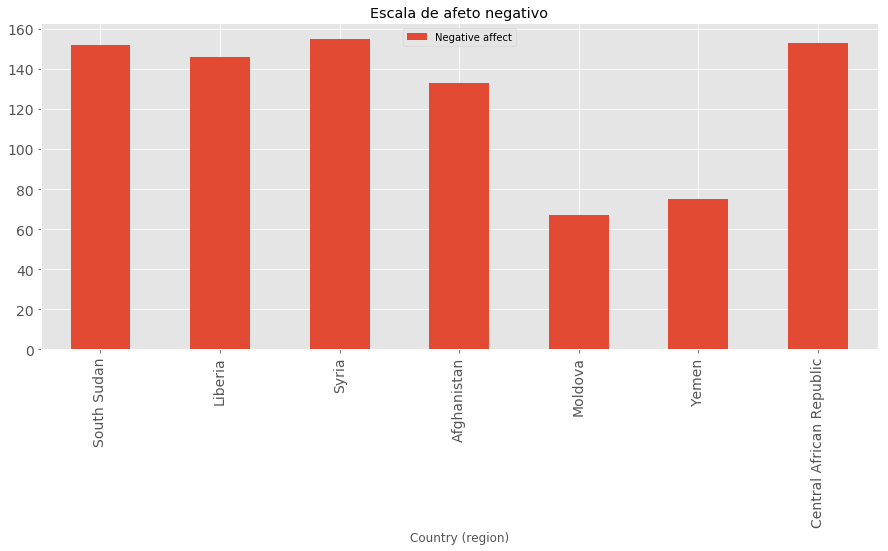

In [0]:
bad_countries.plot(x='Country (region)', y='Negative affect', title='Escala de afeto negativo', fontsize='14', figsize=(15, 6), kind='bar')

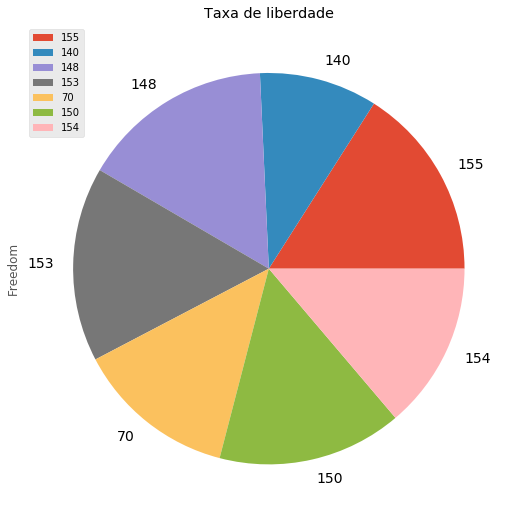

In [0]:
bad_countries.plot(x='Country (region)', y='Freedom', title='Taxa de liberdade', fontsize='14', figsize=(18, 9), kind='pie')

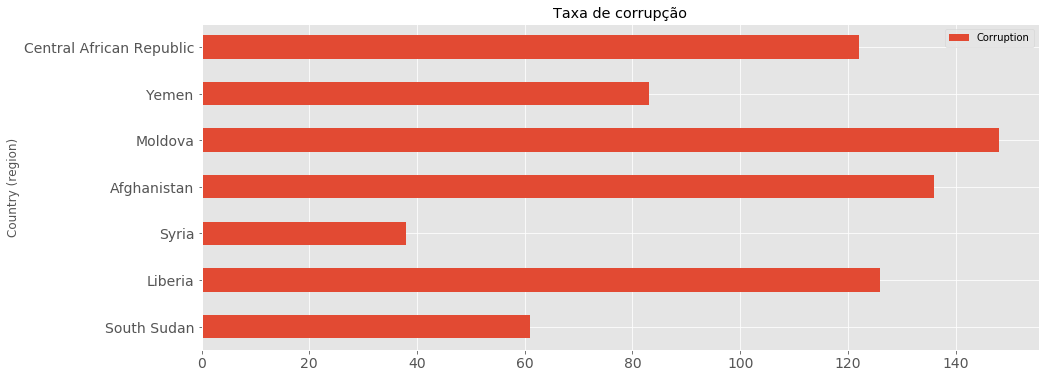

In [0]:
bad_countries.plot(x='Country (region)', y='Corruption', title='Taxa de corrupção', fontsize='14', figsize=(15, 6), kind='barh')

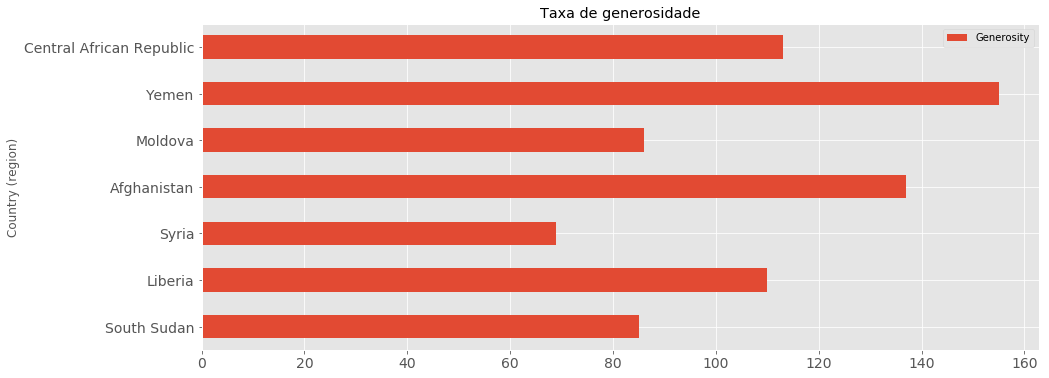

In [0]:
bad_countries.plot(x='Country (region)', y='Generosity', title='Taxa de generosidade', fontsize='14', figsize=(15, 6), kind='barh')

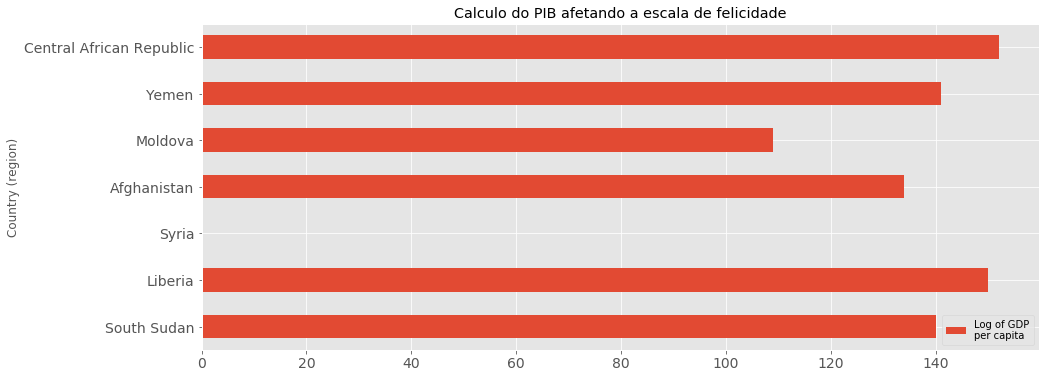

In [0]:
bad_countries.plot(x='Country (region)', y='Log of GDP\nper capita', title='Calculo do PIB afetando a escala de felicidade', fontsize='14', figsize=(15, 6), kind='barh')

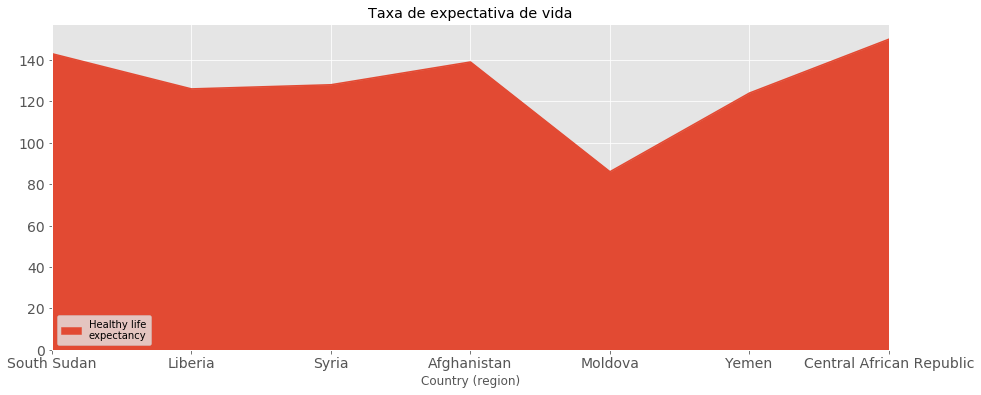

In [0]:
bad_countries.plot(x='Country (region)', y='Healthy life\nexpectancy', title='Taxa de expectativa de vida', fontsize='14', figsize=(15, 6), kind='area')

In [0]:
bad_countries

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
155,South Sudan,156,140,127,152,148,154,61,85,140,143
140,Liberia,141,156,103,146,127,94,126,110,150,126
148,Syria,149,137,155,155,154,153,38,69,0,128
153,Afghanistan,154,25,152,133,151,155,136,137,134,139
70,Moldova,71,45,133,67,65,128,148,86,109,86
150,Yemen,151,85,153,75,100,147,83,155,141,124
154,Central African Republic,155,117,132,153,155,133,122,113,152,150


## Conclusão da questão 1

A partir dos países constatados com o menor índice podemos verificar que estes são países do continente africano como: **Sudão do Sul, República Centro-Africana, Libéria**, países pobres com condições de vida precária. Além de países da ásia que se encontram em guerras civis como: **Síria, Afeganistão, Iêmen**, com excessão da região de Moldávia que se encontra no leste Europeu. A partir dos gráficos apresentados podemos verificar que temos altas taxas de fatores nos países relacionados, ou seja, o baixo afeto positivo, afeto negativo, pib, expectativa de vida, liberdade, corrupção, generosidade afetam diretamente a felicidade nestes países.

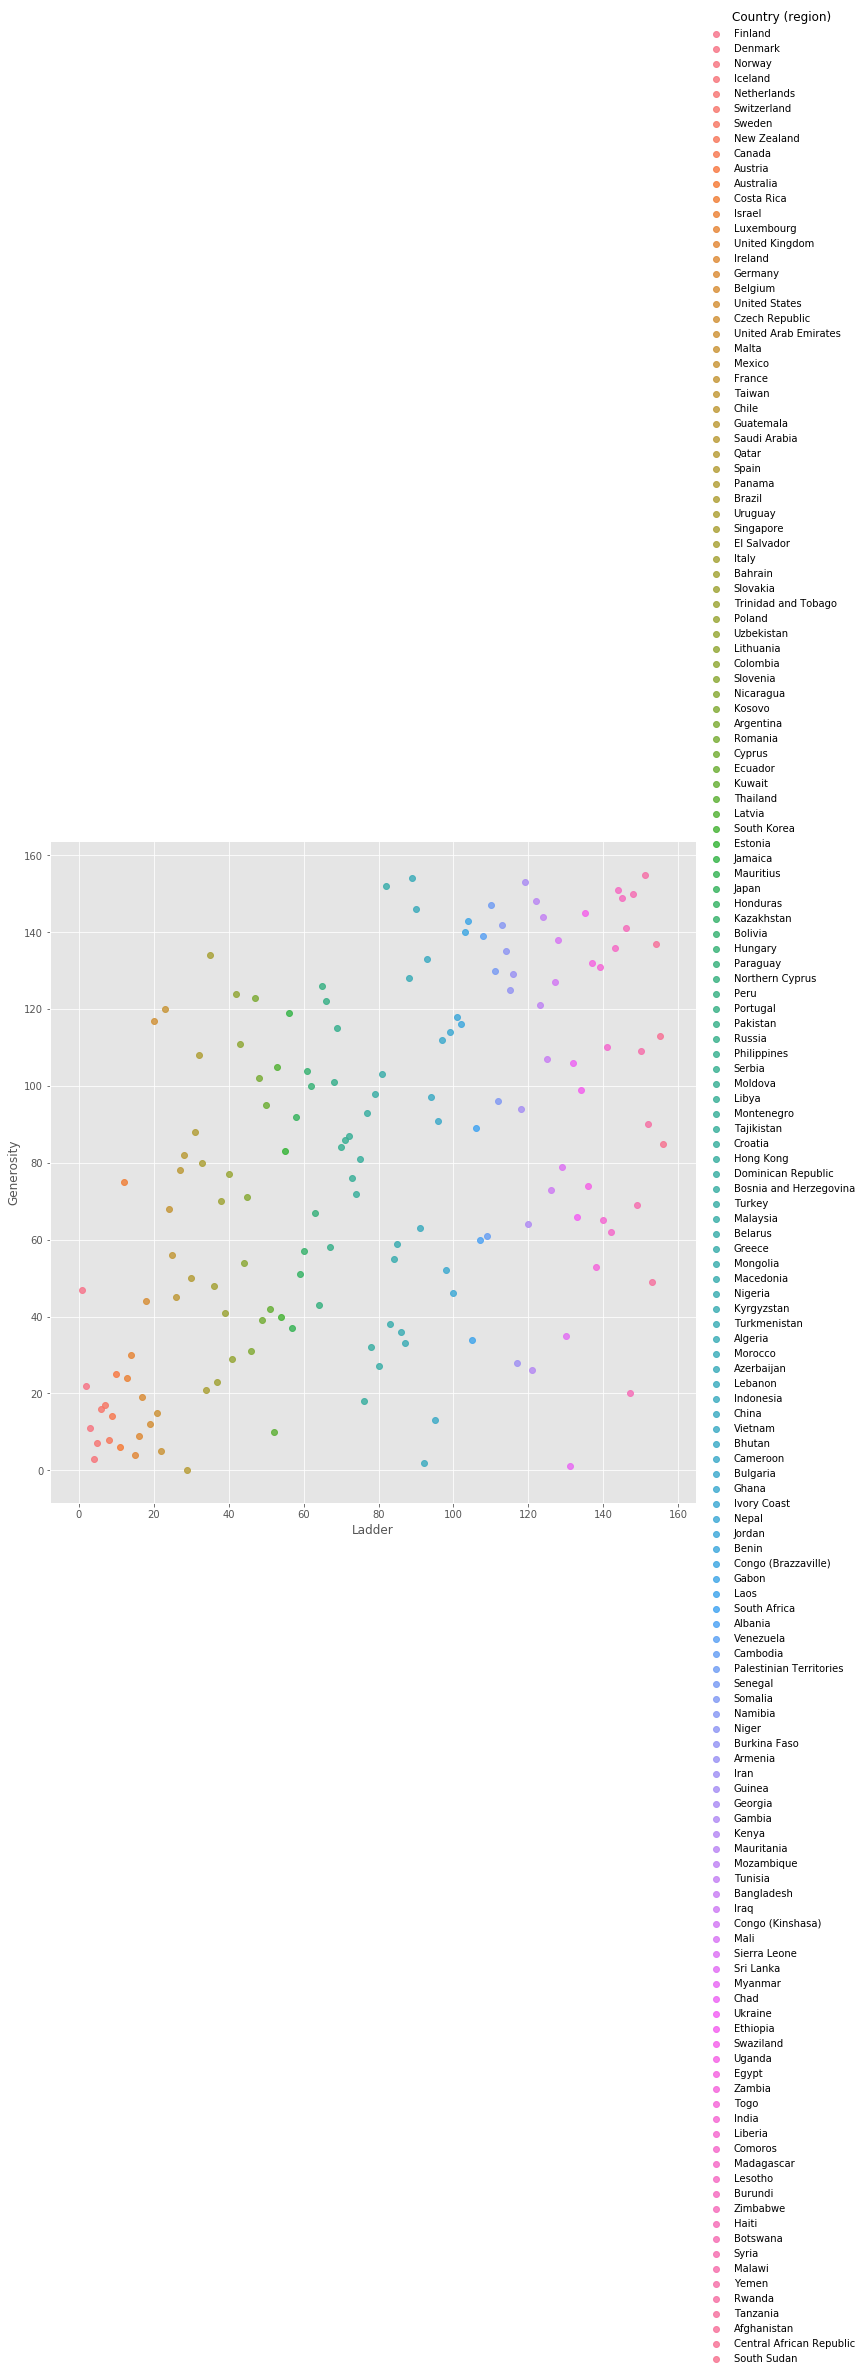

In [0]:
sns.lmplot(x="Ladder", y="Generosity", data=df, fit_reg=False, order=5, hue='Country (region)', legend=True, height=10)
plt.show()

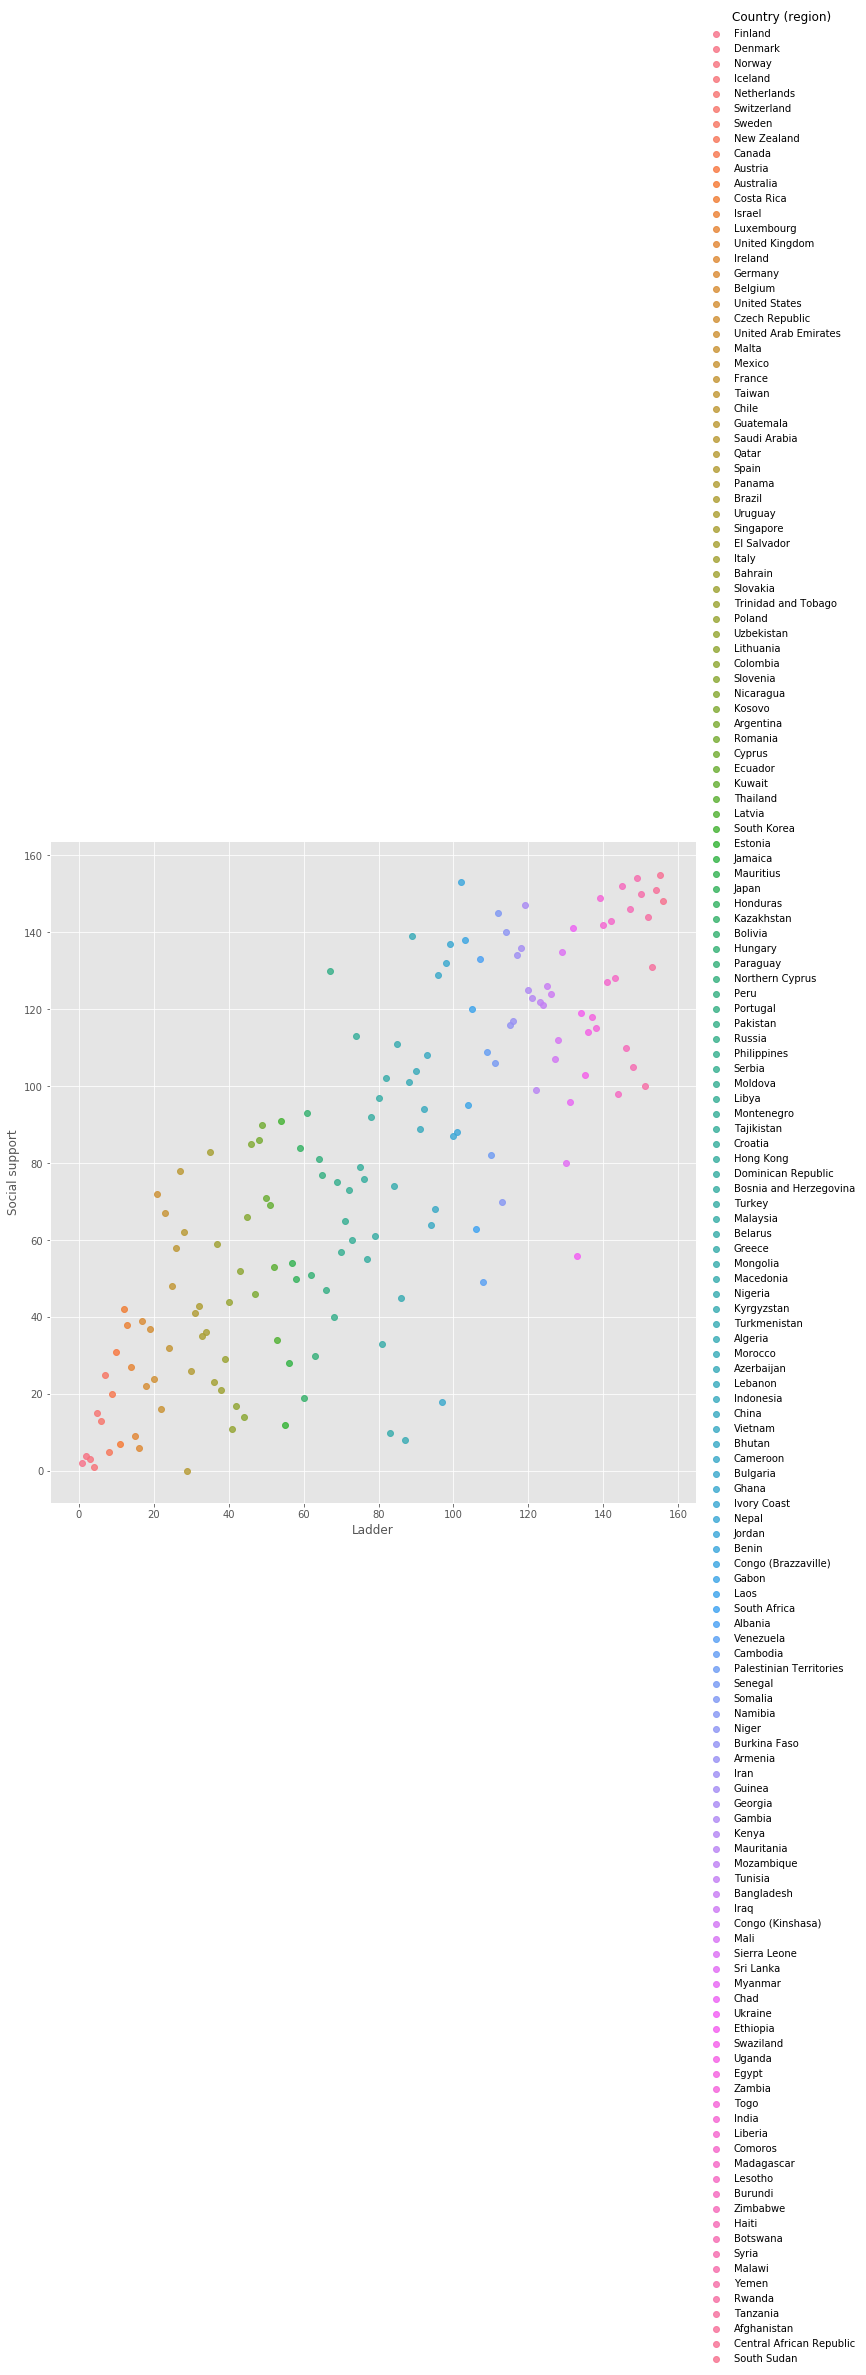

In [0]:
sns.lmplot(x="Ladder", y="Social support", data=df, fit_reg=False, order=5, hue='Country (region)', legend=True, height=10)
plt.show()

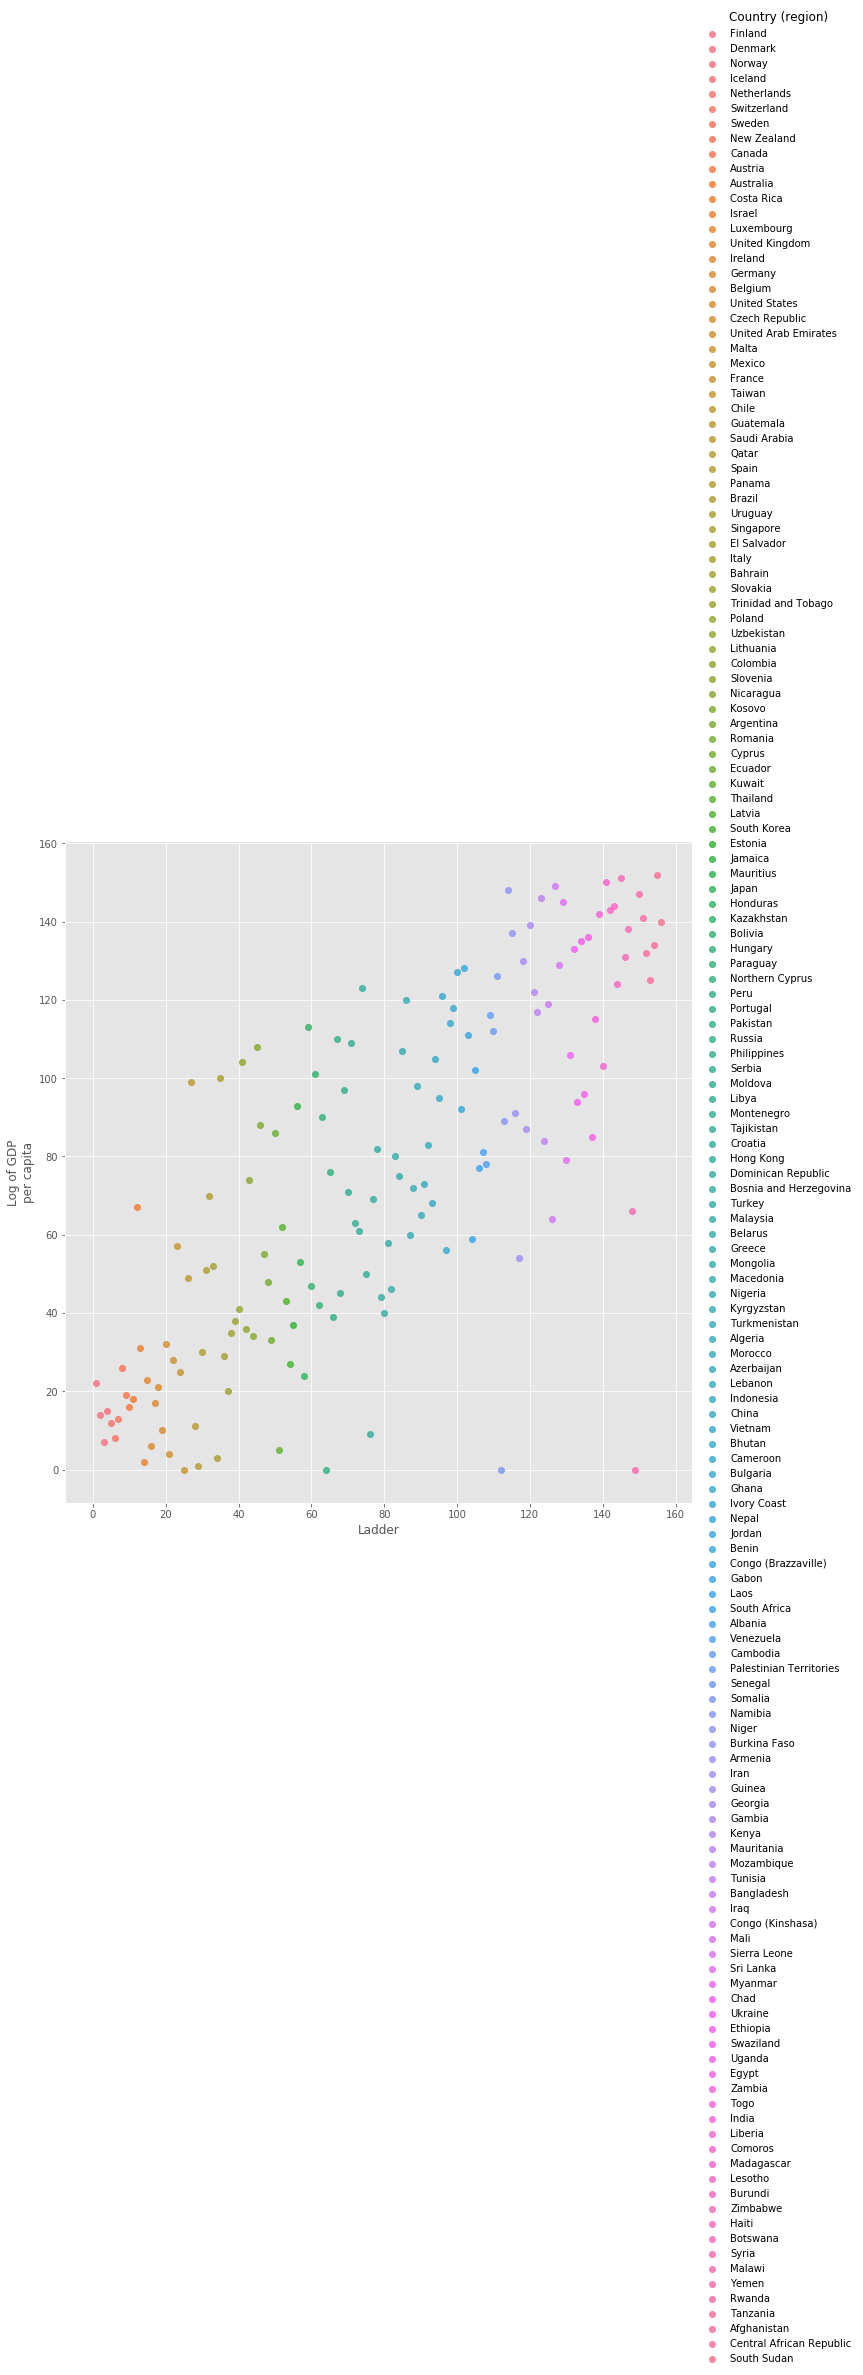

In [0]:
sns.lmplot(x="Ladder", y="Log of GDP\nper capita", data=df, fit_reg=False, order=5, hue='Country (region)', legend=True, height=10)
plt.show()

## 2 - A escala de satisfação com a vida é afetada pela expectativa de vida nas regiões analisadas?

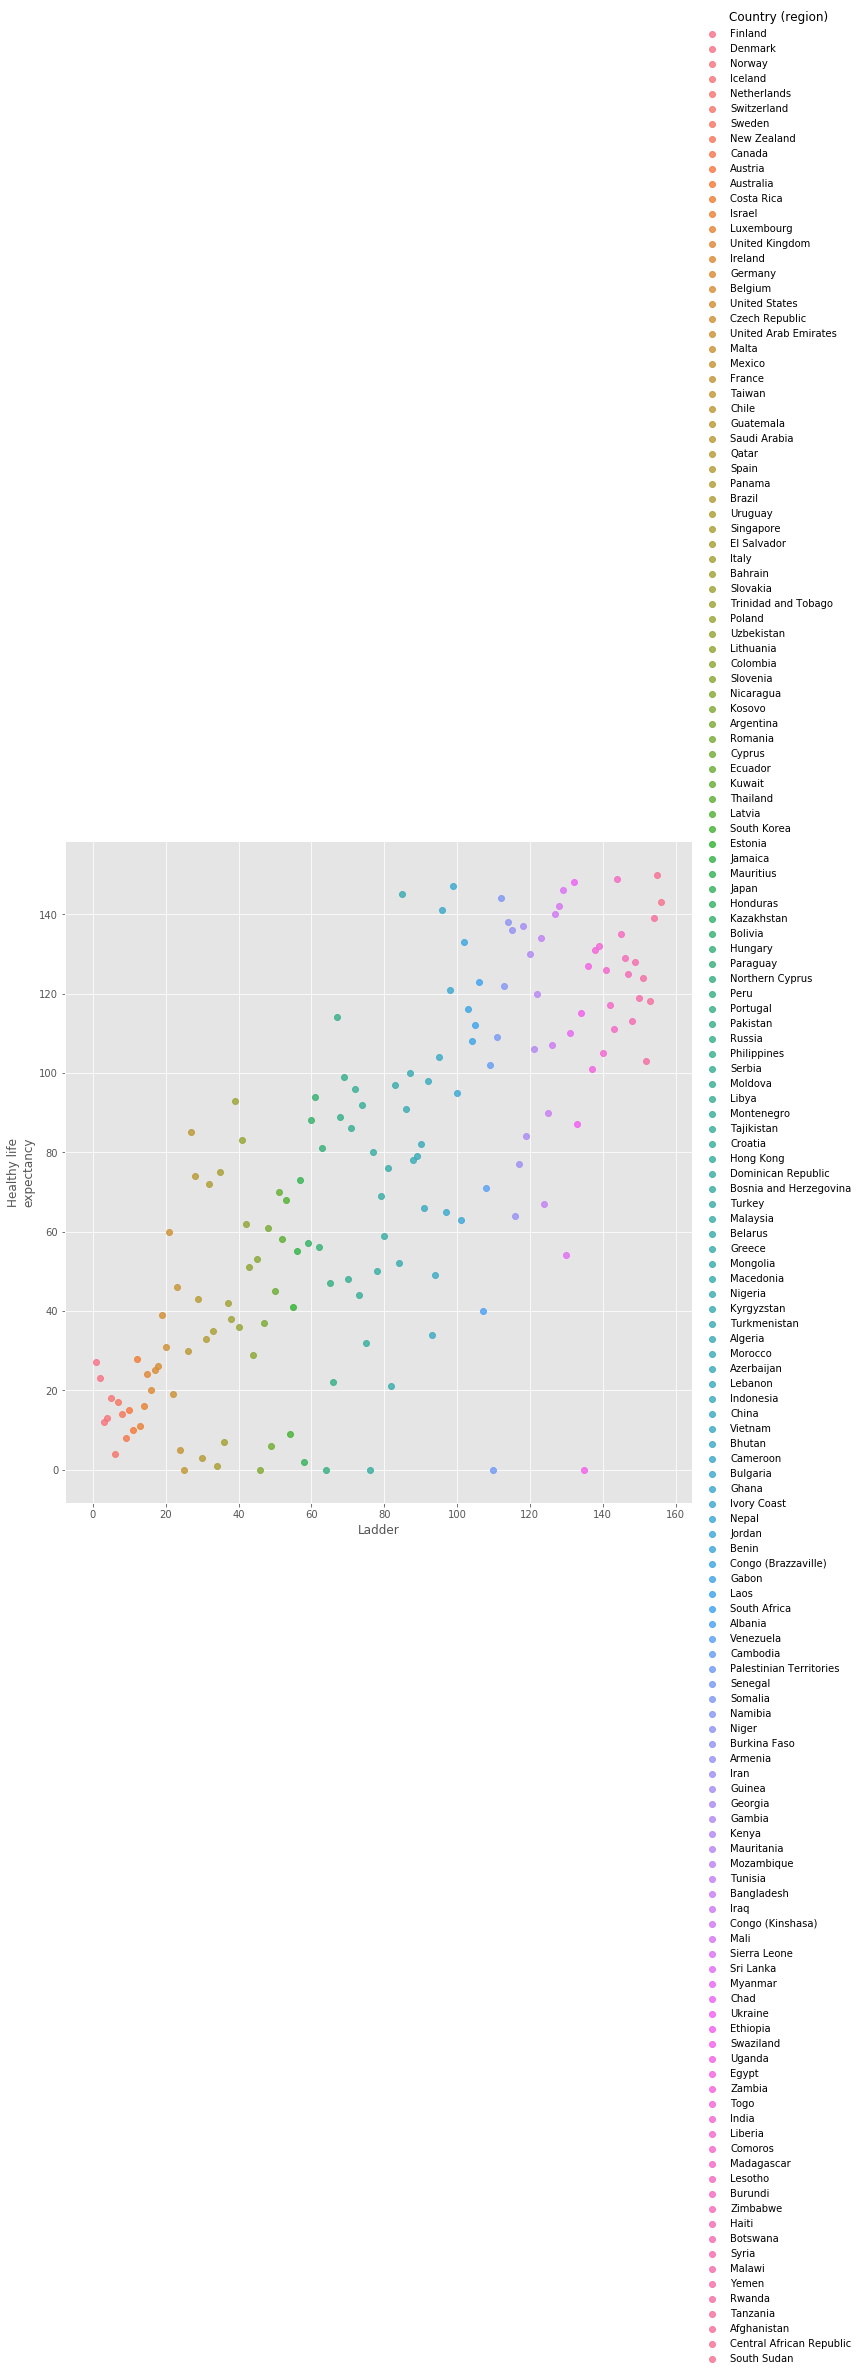

In [0]:
# analise da duas medidas (Escada de satisfação com a vida e Expectativa de vida)

sns.lmplot(x="Ladder", y="Healthy life\nexpectancy", data=df, fit_reg=False, order=5, hue='Country (region)', legend=True, height=10)
plt.show()

### Conclusão da questão 2

A partir do gráfico de dispersão analisado, podemos constatar uma correlação positiva média entre os fatores de ***Ladder*** **(Escala de satisfação com a vida)** e ***Healthy life expectancy*** **(Expectativa de vida)**. As regiões (paises) com os melhores pontuações **(score)** na escala de satisfação com a vida, tem como característica uma posição relevante na escala de expectativa de vida, paises como **Finlândia, Dinamarca, Noruega**. Segundo [Banco Mundial](http://datatopics.worldbank.org/world-development-indicators), a expectativa de vida destes países são:

* Finlândia = **81,78 anos (2016)**
* Dinamarca = **80,70 anos (2016)**
* Noruega  = **82,51 anos (2016)**

Já os países com uma posição inferior aos demais no **score**, tem como expectativa de vida os seguintes dados:

* Sudão do Sul = **56,81 anos (2016)**
* República Centro-Africana = **52,17 anos (2016)**
* Afeganistão = **63,67 anos (2016)**